In [77]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_fixedy_200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)

data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,eps_greedy_value,optimal_outcome_actions,opt_policy_index,opt_policy_value,optimal_outcome_policy
0,1223.604358,1602.465545,1599.533179,46,34.925055,2203.158085,3,36.350947,1849.710040
1,1620.627103,1585.784091,1430.867973,3,36.350947,2055.956672,3,36.350947,1841.359495
2,1520.332034,1697.714633,1254.045007,3,36.350947,1944.908063,3,36.350947,1800.998238
3,1403.941530,1773.237391,1416.773950,46,34.925055,2110.490386,3,36.350947,1963.589876
4,1673.001475,1686.543466,1093.320097,85,34.785434,1961.152723,3,36.350947,1906.710837
...,...,...,...,...,...,...,...,...,...
43,1824.781177,1830.690245,1610.497635,46,34.925055,2200.611356,3,36.350947,1950.306675
44,1710.437625,1852.233803,1162.096995,46,34.925055,2088.973919,3,36.350947,1686.577214
45,1935.866826,1653.093477,1321.581423,46,34.925055,2145.130703,3,36.350947,1846.065034
46,1995.890322,1824.884874,1406.227606,46,34.925055,2044.887830,3,36.350947,1873.922726


In [78]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'optimal_outcome_policy', 'eps_greedy_policy', 'optimal_policy', "opt_policy_index", "eps_greedy_value", "opt_policy_value"]:
        data[f'regret_{column}'] = data['optimal_outcome_policy'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,eps_greedy_value,optimal_outcome_actions,opt_policy_index,opt_policy_value,optimal_outcome_policy,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction
0,1223.604358,1602.465545,1599.533179,46,34.925055,2203.158085,3,36.350947,1849.710040,626.105683,247.244495,250.176861,626.105683,247.244495,250.176861
1,1620.627103,1585.784091,1430.867973,3,36.350947,2055.956672,3,36.350947,1841.359495,220.732393,255.575404,410.491523,846.838075,502.819899,660.668384
2,1520.332034,1697.714633,1254.045007,3,36.350947,1944.908063,3,36.350947,1800.998238,280.666204,103.283605,546.953231,1127.504279,606.103505,1207.621615
3,1403.941530,1773.237391,1416.773950,46,34.925055,2110.490386,3,36.350947,1963.589876,559.648346,190.352486,546.815926,1687.152626,796.455990,1754.437541
4,1673.001475,1686.543466,1093.320097,85,34.785434,1961.152723,3,36.350947,1906.710837,233.709362,220.167371,813.390739,1920.861988,1016.623361,2567.828280


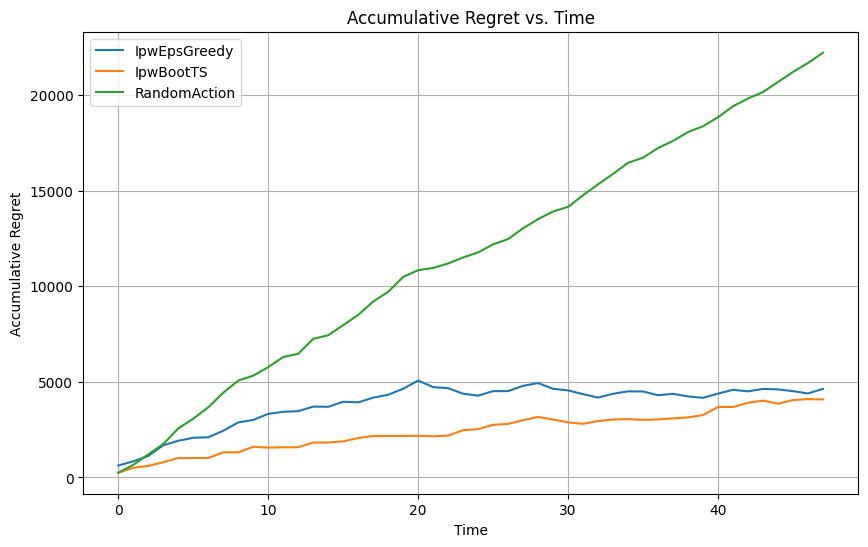

In [79]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret Compare to Optimal Policy vs. Time')
ax.legend()

plt.grid(True)
plt.show()


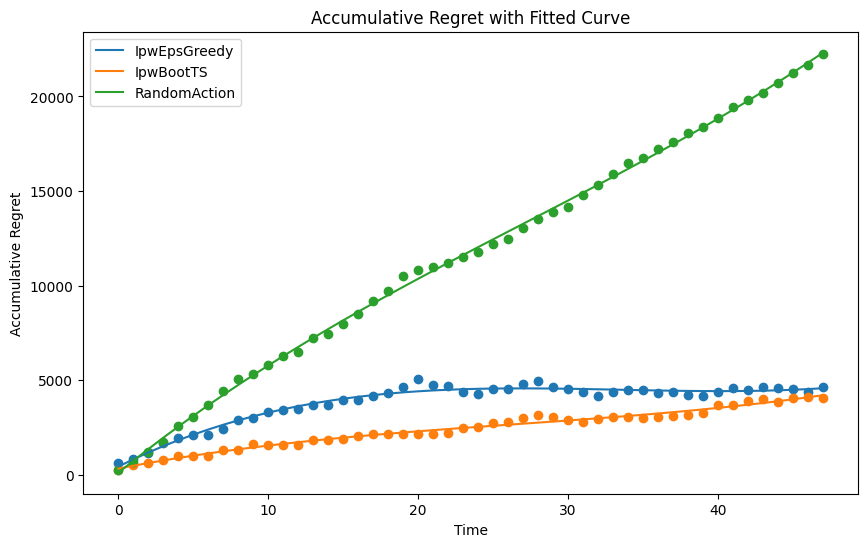

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
